In [1]:
! module load cudatoolkit/11.7
! module load cudnn/8.9.1_cuda11

In [1]:
import numpy  as np
import healpy as hp
import matplotlib.pyplot as plt
import sys
#
sys.path.append('../sht')
from sht import DirectSHT
#
%load_ext autoreload
%autoreload 2

JAX not found. Falling back to NumPy.
JAX not found. Falling back to NumPy.
JAX not found. Falling back to NumPy.


In [2]:
# We can very quickly calculate Ylm values. As an example, compute them up to lmax=Nl
Nl = 500
Nx = 1024
#
sht= DirectSHT(Nl,Nx)

In [3]:
# Put a sequence of points on the equator
phis   = np.linspace(0,2*np.pi,10)
thetas = np.ones_like(phis)*np.pi/2
wts    = np.ones_like(phis)
#
# And some along the meridian -- avoiding high |x|.
new_thetas = (np.arange(6)+1.5)/8. * np.pi
thetas = np.append(thetas,new_thetas)
phis   = np.append(phis,np.zeros_like(new_thetas))
wts    = np.append(wts,np.ones_like(new_thetas))

In [4]:
alms = sht(thetas,phis,wts)

Sorting took  2.0265579223632812e-05  seconds.
Digitizing took  0.0003426074981689453  seconds.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Precomputing vs took  1.0550336837768555  seconds.
Computing alm's took  0.8400201797485352  seconds.
Sorting took  1.8835067749023438e-05  seconds.
Digitizing took  0.0002779960632324219  seconds.
Precomputing vs took  0.8161711692810059  seconds.
Computing alm's took  0.7907299995422363  seconds.


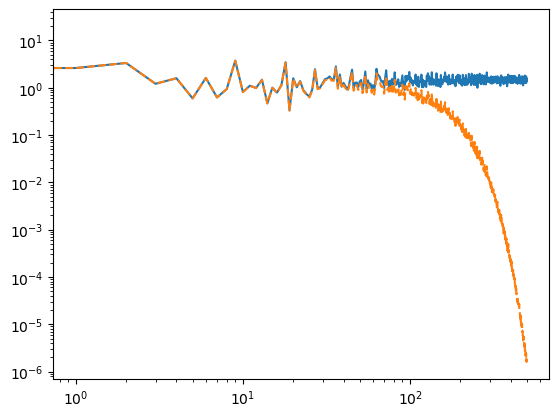

In [5]:
# Let's convolve the alms with a beam 
alms_smooth = hp.sphtfunc.smoothalm(alms,fwhm=np.pi/180,pol=False,inplace=False)
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

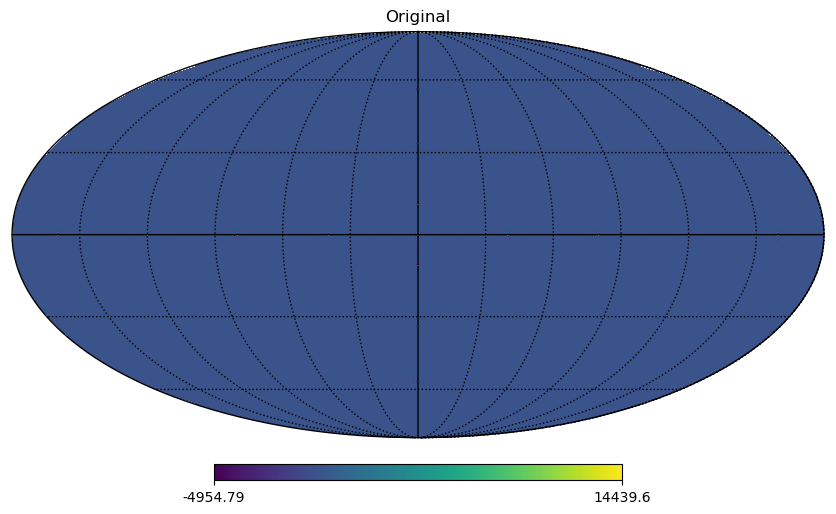

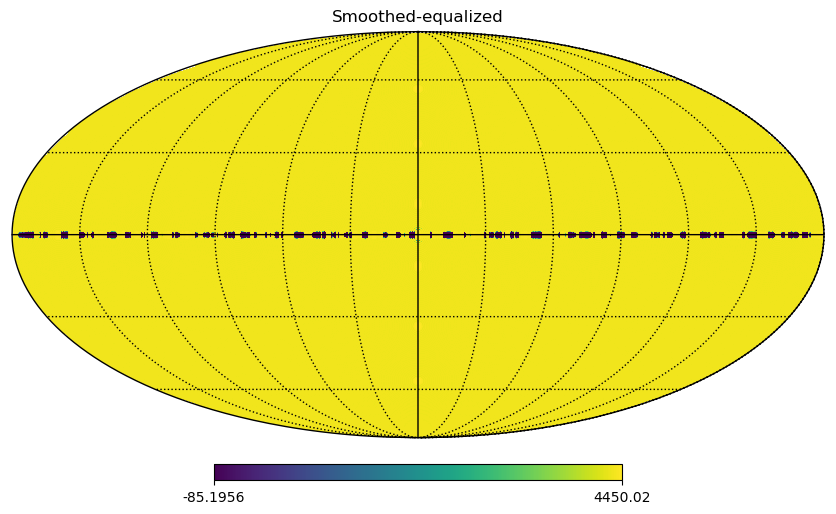

In [6]:
nside = 512
#
hp.mollview(hp.alm2map(alms, nside), title='Original')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside),norm='hist', title='Smoothed-equalized')
hp.graticule()
plt.show()

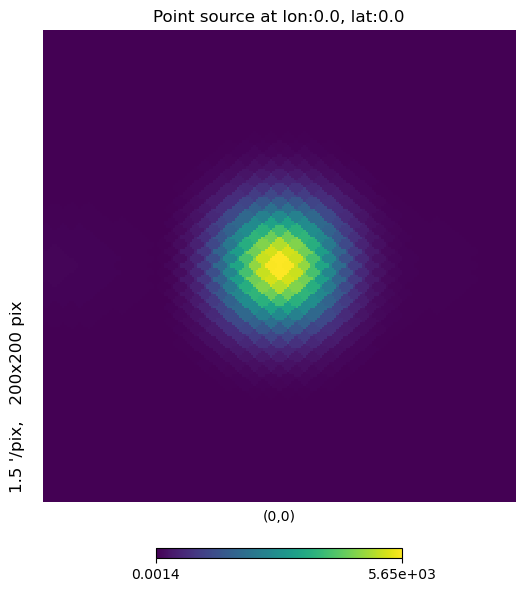

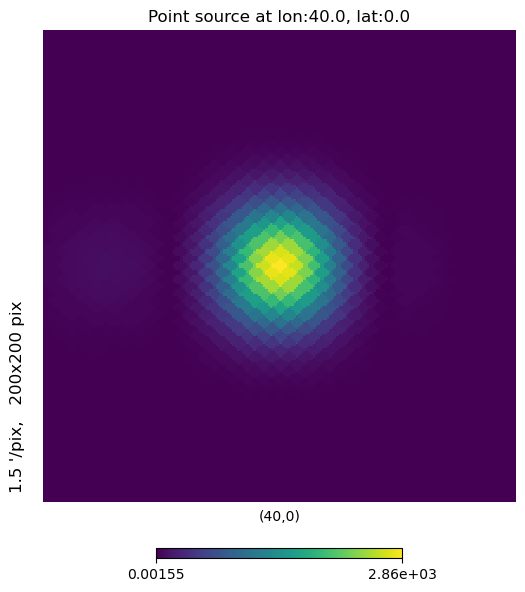

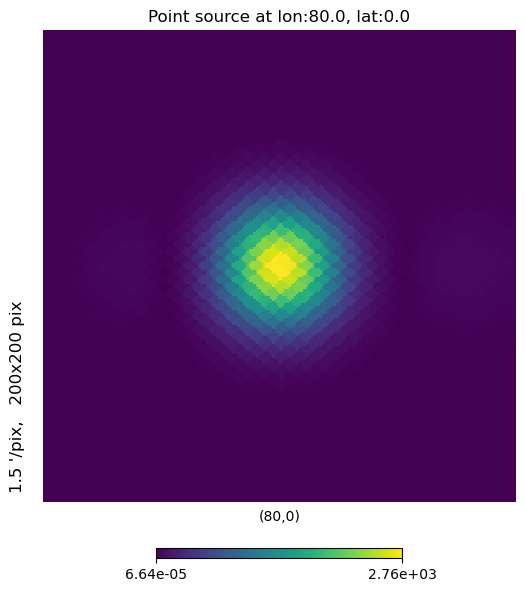

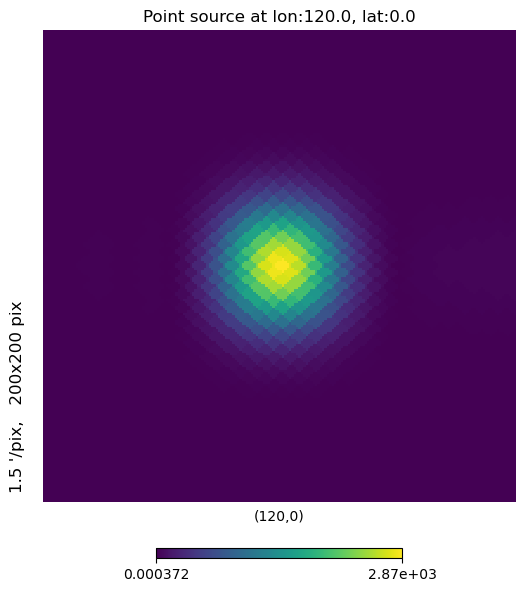

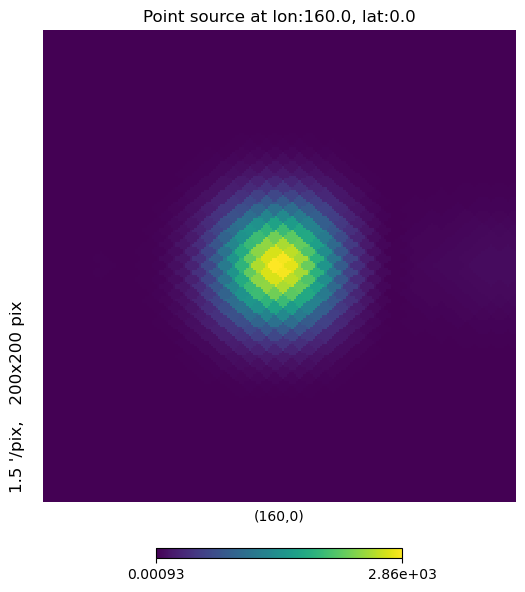

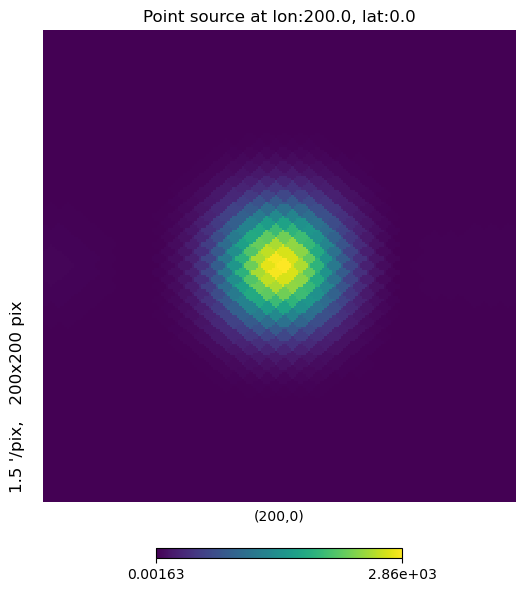

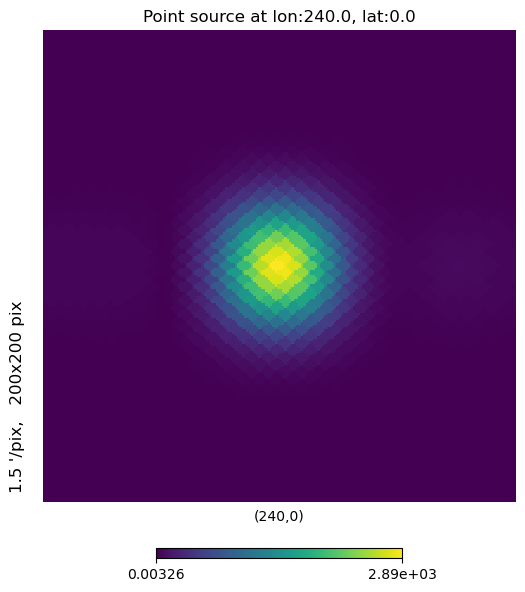

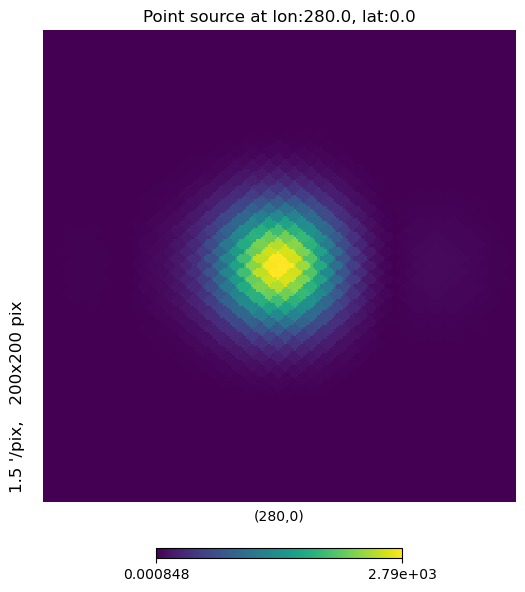

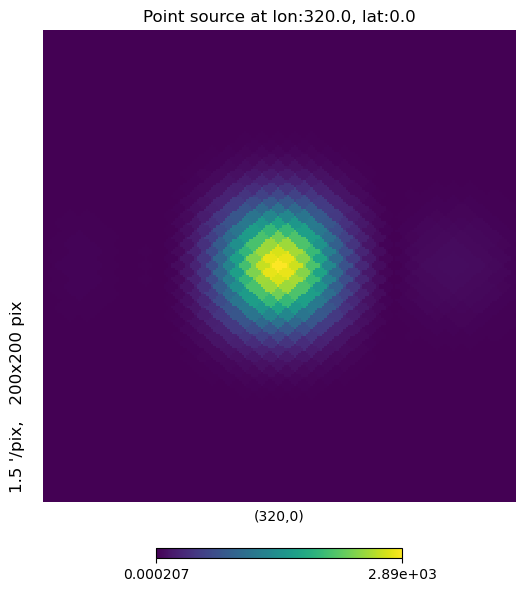

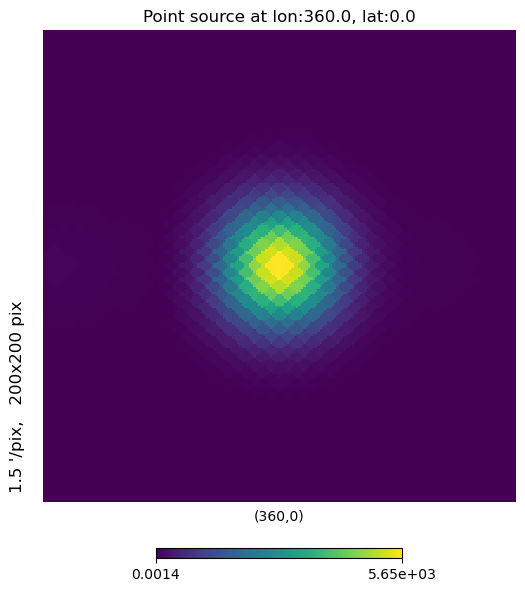

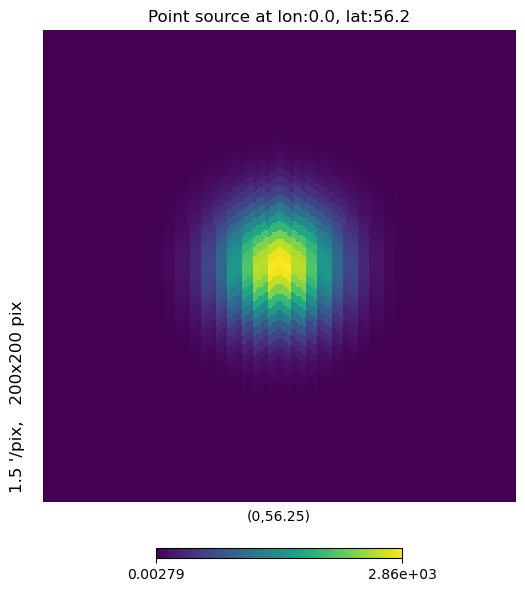

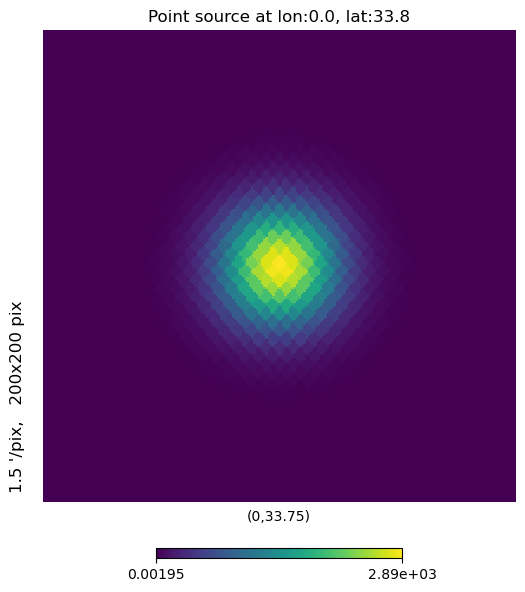

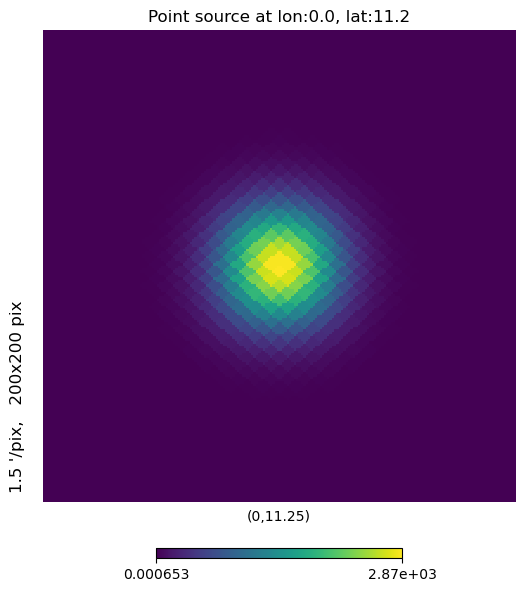

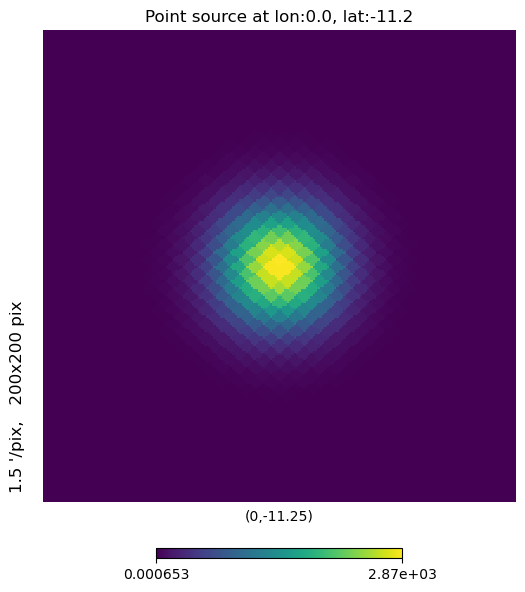

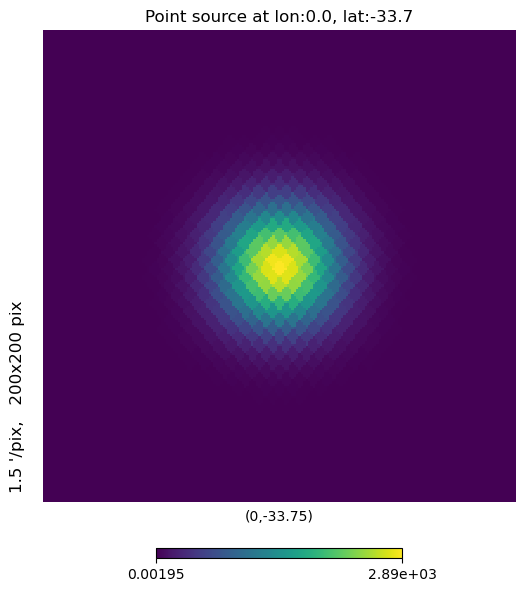

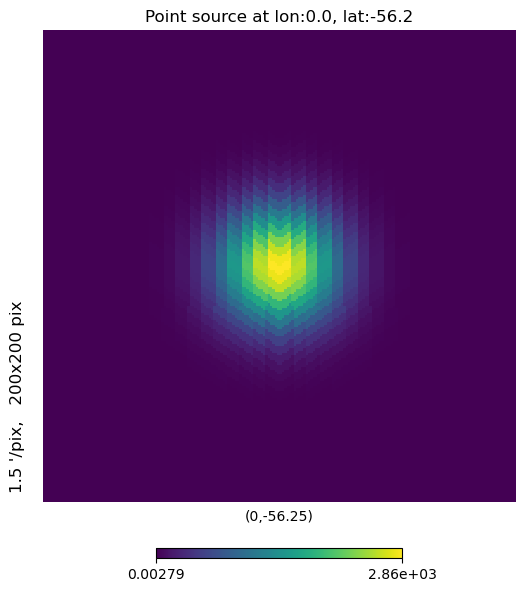

In [10]:
def thetaphi_to_lonlat(theta,phi):
    # Return longitude and latitude in degrees.
    return np.degrees(phi),90.0-np.degrees(theta)

smoothed_map = np.abs(hp.alm2map(alms_smooth, nside))

for t, p in zip(thetas, phis):
    lon, lat = thetaphi_to_lonlat(t,p)
    hp.gnomview(smoothed_map, rot=[lon, lat], title='Point source at lon:{:.1f}, lat:{:.1f}'.format(lon, lat))

## A single point source.

Let's look at a single source.

Sorting took  1.0728836059570312e-05  seconds.
Digitizing took  0.0005350112915039062  seconds.
Precomputing vs took  0.7761521339416504  seconds.
Computing alm's took  0.7855250835418701  seconds.


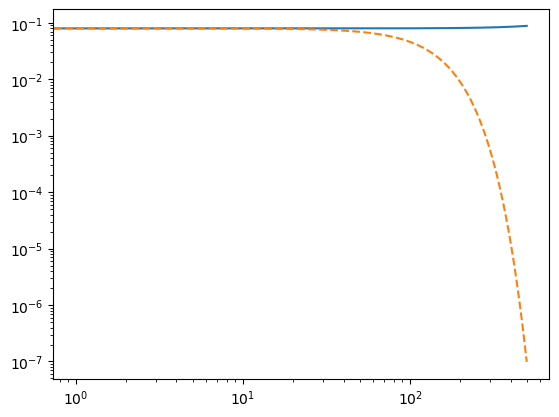

In [11]:
# Look at a single point.
phis   = np.array([np.pi/4.0])
thetas = np.ones_like(phis)*3*np.pi/8
wts    = np.ones_like(thetas)
#
alms = sht(thetas,phis,wts)
alms_smooth = hp.sphtfunc.smoothalm(alms,fwhm=np.pi/180,pol=False,inplace=False)
#
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

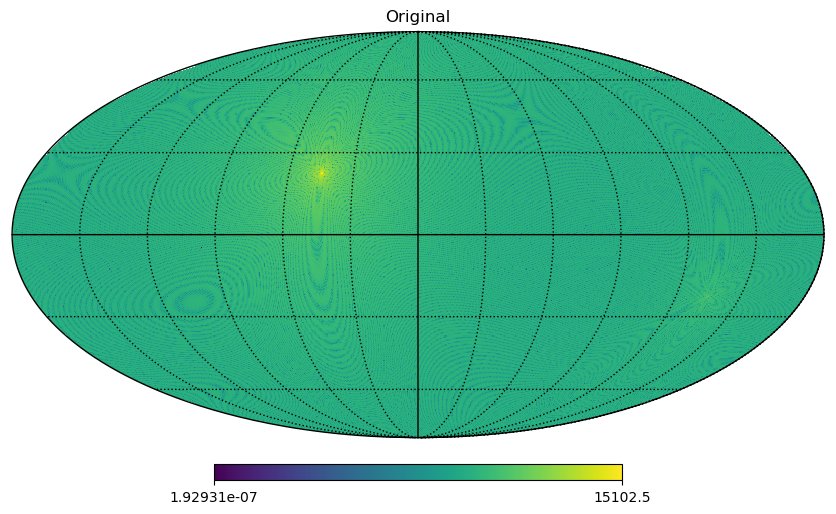

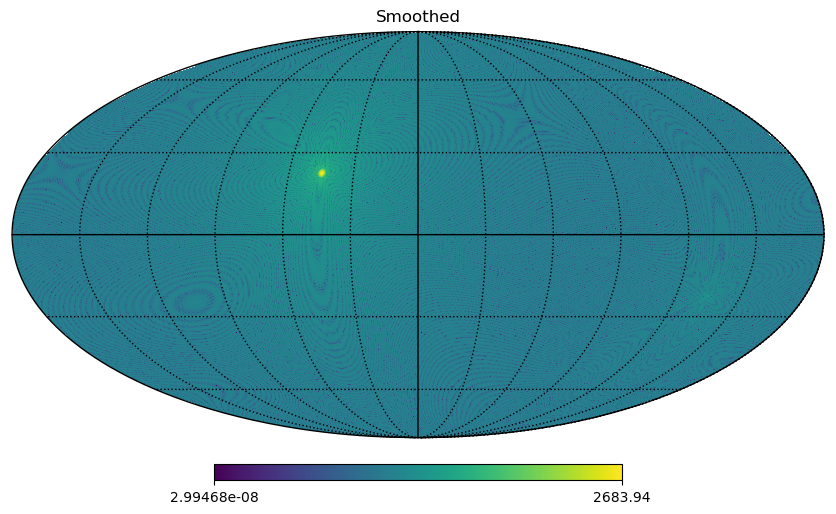

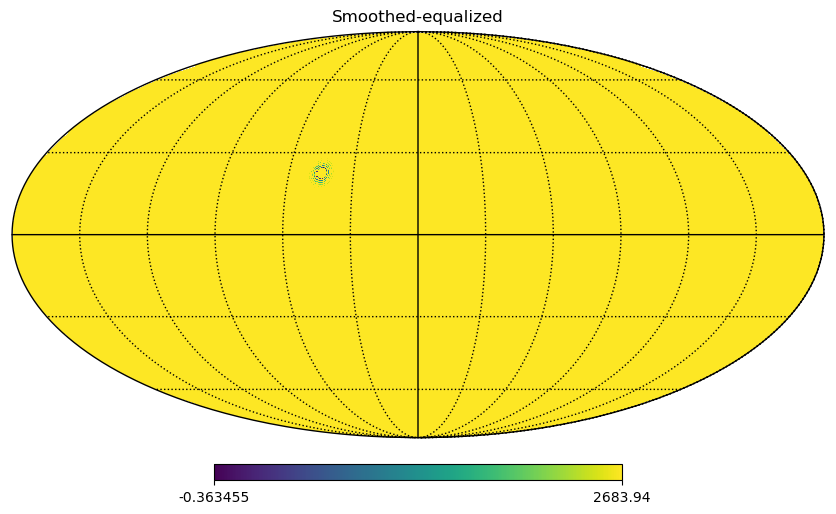

In [13]:
nside = 512
#
hp.mollview(np.abs(hp.alm2map(alms, nside)),norm='log', title='Original')
hp.graticule()
plt.show()
hp.mollview(np.abs(hp.alm2map(alms_smooth, nside)),norm='log', title='Smoothed')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside),norm='hist', title='Smoothed-equalized')
hp.graticule()
plt.show()

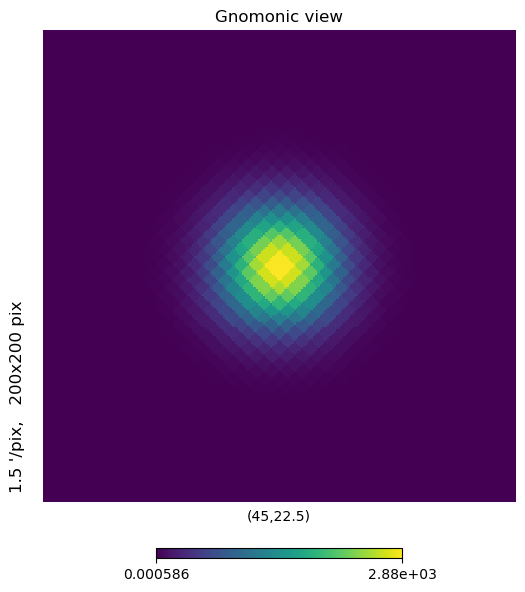

In [14]:

for t, p in zip(thetas, phis):
    lon, lat = thetaphi_to_lonlat(t,p)
    hp.gnomview(np.abs(hp.alm2map(alms_smooth, nside)), rot=[lon, lat])

## Sampling from a uniform density.

In [15]:
rng = np.random.default_rng()

Sorting took  0.026501893997192383  seconds.
Digitizing took  0.01538705825805664  seconds.
Precomputing vs took  2.4441158771514893  seconds.
Computing alm's took  0.7549960613250732  seconds.
Sorting took  0.02752685546875  seconds.
Digitizing took  0.014478206634521484  seconds.
Precomputing vs took  2.47350811958313  seconds.
Computing alm's took  0.7431209087371826  seconds.


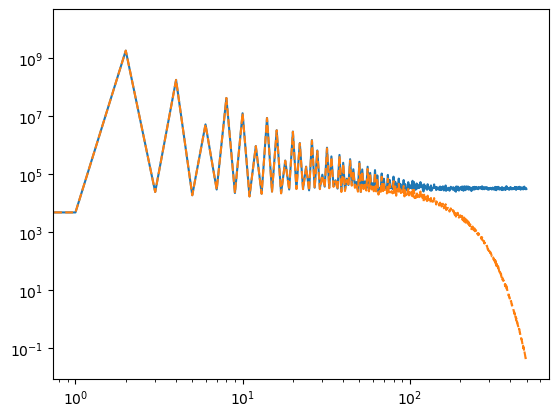

In [16]:
# Look at points drawn at random from a uniform density
# between DEC=-30 and DEC=+30.
Npnt      = 400000
cmin,cmax = np.sin(np.radians(-30)),np.sin(np.radians(30.))
theta     = np.arccos(rng.uniform(low=cmin,high=cmax,size=Npnt))
phi       = rng.uniform(low=0.0,high=2*np.pi,size=Npnt)
wt        = np.ones(Npnt)
#
alms = sht(theta,phi,wt)
alms_smooth = hp.sphtfunc.smoothalm(alms,fwhm=np.pi/180,pol=False,inplace=False)
#
plt.loglog(hp.alm2cl(alms))
plt.loglog(hp.alm2cl(alms_smooth), ls='--')

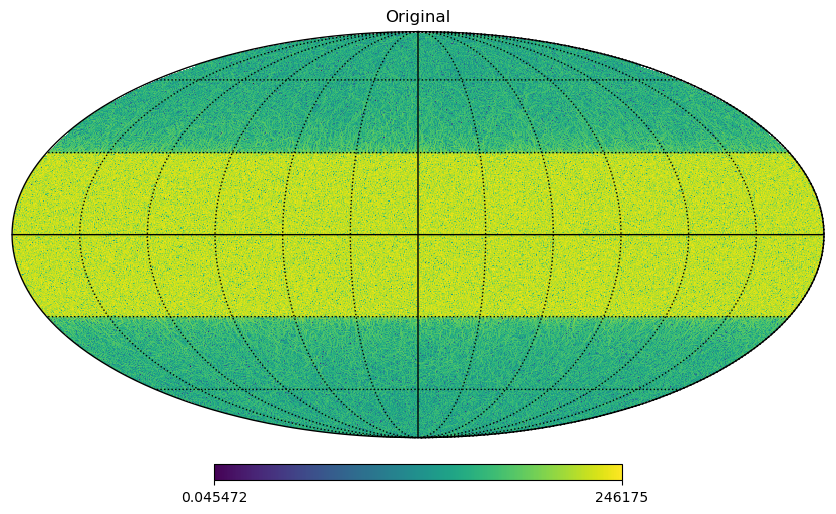

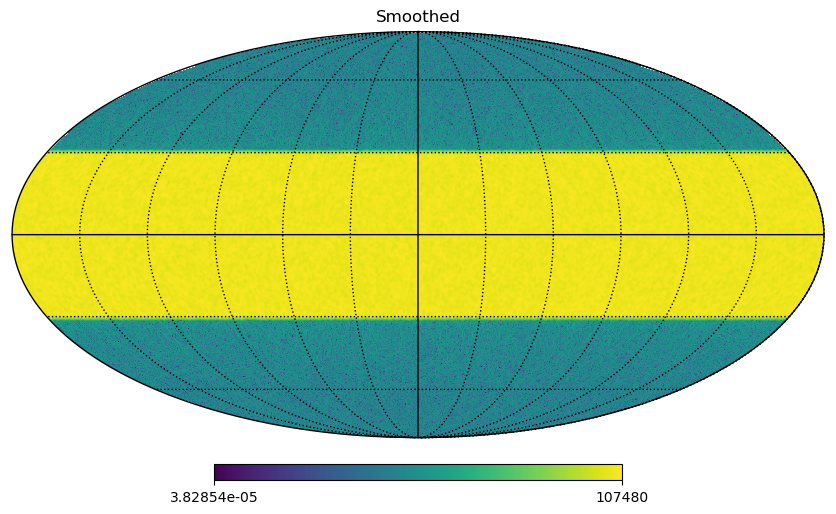

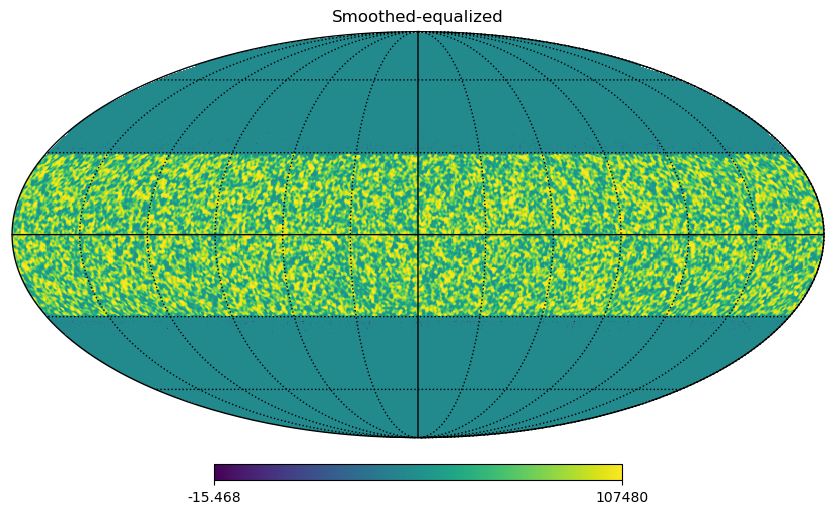

In [17]:
nside = 512
#
hp.mollview(np.abs(hp.alm2map(alms, nside)),norm='log', title='Original')
hp.graticule()
plt.show()
hp.mollview(np.abs(hp.alm2map(alms_smooth, nside)),norm='log', title='Smoothed')
hp.graticule()
plt.show()
hp.mollview(hp.alm2map(alms_smooth, nside),norm='hist', title='Smoothed-equalized')
hp.graticule()
plt.show()

# The End